In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier  
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix 
import warnings
warnings.filterwarnings("ignore")

In [2]:
col_names = np.array(["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate", "class", 'difficulty level'])

In [3]:
data1 = pd.read_csv('D:\Air quality data\KDDTrain.csv' , names = col_names)
data2 = pd.read_csv('D:\Air quality data\KDDTest.csv', names = col_names)

In [4]:
print(data1)
print(data2)

        duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0              0           tcp  ftp_data   SF        491          0     0   
1              0           udp     other   SF        146          0     0   
2              0           tcp   private   S0          0          0     0   
3              0           tcp      http   SF        232       8153     0   
4              0           tcp      http   SF        199        420     0   
...          ...           ...       ...  ...        ...        ...   ...   
125968         0           tcp   private   S0          0          0     0   
125969         8           udp   private   SF        105        145     0   
125970         0           tcp      smtp   SF       2231        384     0   
125971         0           tcp    klogin   S0          0          0     0   
125972         0           tcp  ftp_data   SF        151          0     0   

        wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0      

In [5]:
data1.shape

(125973, 43)

In [6]:
data2.shape

(22544, 43)

In [7]:
data1.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
5,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
7,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
9,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21


In [8]:
data2.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,mscan,11
5,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,normal,21
6,0,tcp,smtp,SF,1022,387,0,0,0,0,...,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04,normal,21
7,0,tcp,telnet,SF,129,174,0,0,0,0,...,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,guess_passwd,15
8,0,tcp,http,SF,327,467,0,0,0,0,...,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,normal,21
9,0,tcp,ftp,SF,26,157,0,0,0,0,...,0.50,0.08,0.02,0.00,0.00,0.00,0.00,0.00,guess_passwd,7


In [9]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [10]:
data1.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [11]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [12]:
data2.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [13]:
data1['class'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [14]:
data1['difficulty level'].unique()

array([20, 15, 19, 21, 18, 17, 16, 12, 14, 11,  2, 13, 10,  9,  8,  7,  3,
        5,  1,  6,  0,  4], dtype=int64)

In [15]:
classLabel_counts = data1.groupby(['class']).size()
classLabel_counts

class
back                 956
buffer_overflow       30
ftp_write              8
guess_passwd          53
imap                  11
ipsweep             3599
land                  18
loadmodule             9
multihop               7
neptune            41214
nmap                1493
normal             67343
perl                   3
phf                    4
pod                  201
portsweep           2931
rootkit               10
satan               3633
smurf               2646
spy                    2
teardrop             892
warezclient          890
warezmaster           20
dtype: int64

In [16]:
per_classLabels = classLabel_counts/data1.shape[0]*100
per_classLabels

class
back                0.758893
buffer_overflow     0.023815
ftp_write           0.006351
guess_passwd        0.042073
imap                0.008732
ipsweep             2.856961
land                0.014289
loadmodule          0.007144
multihop            0.005557
neptune            32.716534
nmap                1.185175
normal             53.458281
perl                0.002381
phf                 0.003175
pod                 0.159558
portsweep           2.326689
rootkit             0.007938
satan               2.883951
smurf               2.100450
spy                 0.001588
teardrop            0.708088
warezclient         0.706501
warezmaster         0.015876
dtype: float64

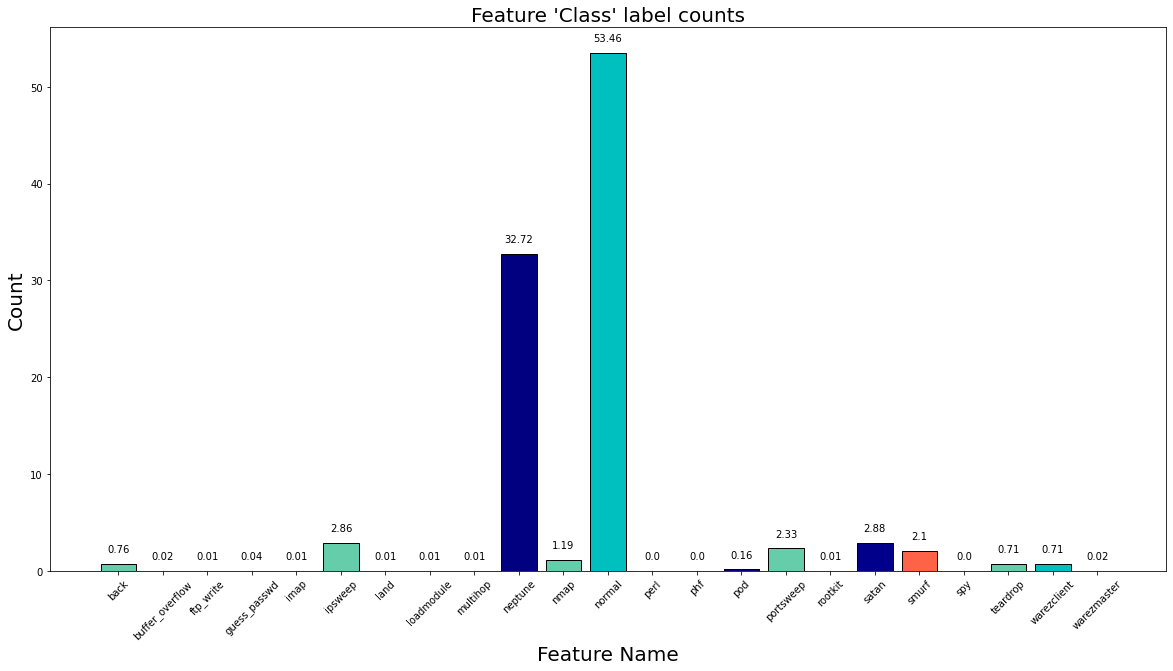

In [17]:
fig = plt.figure(figsize = (20,10))
r = [round(each, 2) for each in per_classLabels.values]
ax = fig.add_subplot(111)
ax.bar(per_classLabels.index, per_classLabels.values, color = ["mediumaquamarine", 'c', 'darkblue', 'tomato', 'navy'], edgecolor = 'black')
ax.set_xticklabels(per_classLabels.index, rotation = 45)
ax.set_xlabel("Feature Name", fontsize = 20)
ax.set_ylabel("Count", fontsize = 20)
ax.set_title("Feature 'Class' label counts", fontsize = 20)

for i in range(len(per_classLabels.values)):
    plt.annotate(str(r[i]), xy=(per_classLabels.index[i],r[i]+1), ha='center', va='bottom')

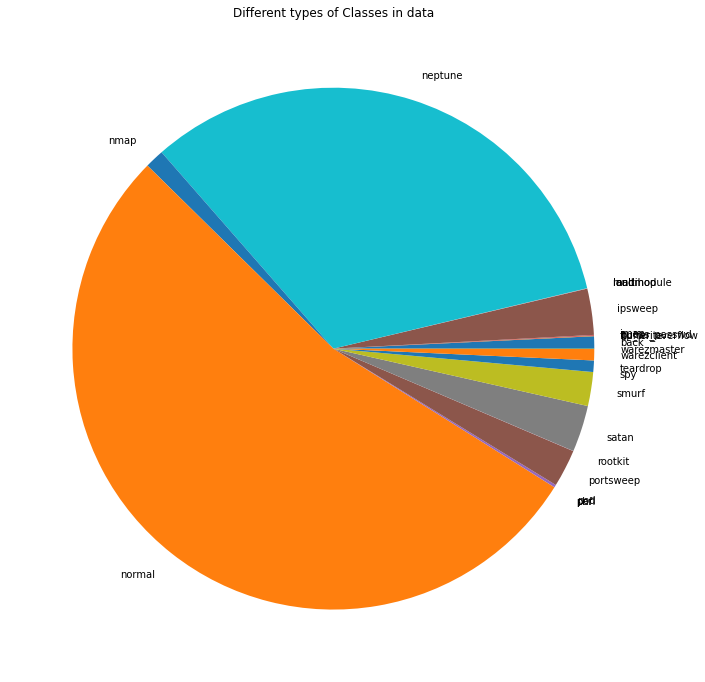

In [18]:
group_data = data1.groupby('class').size()
plt.figure(figsize = (15,12))
group_data.plot(kind='pie')
plt.title("Different types of Classes in data")
plt.ylabel("")
plt.show()

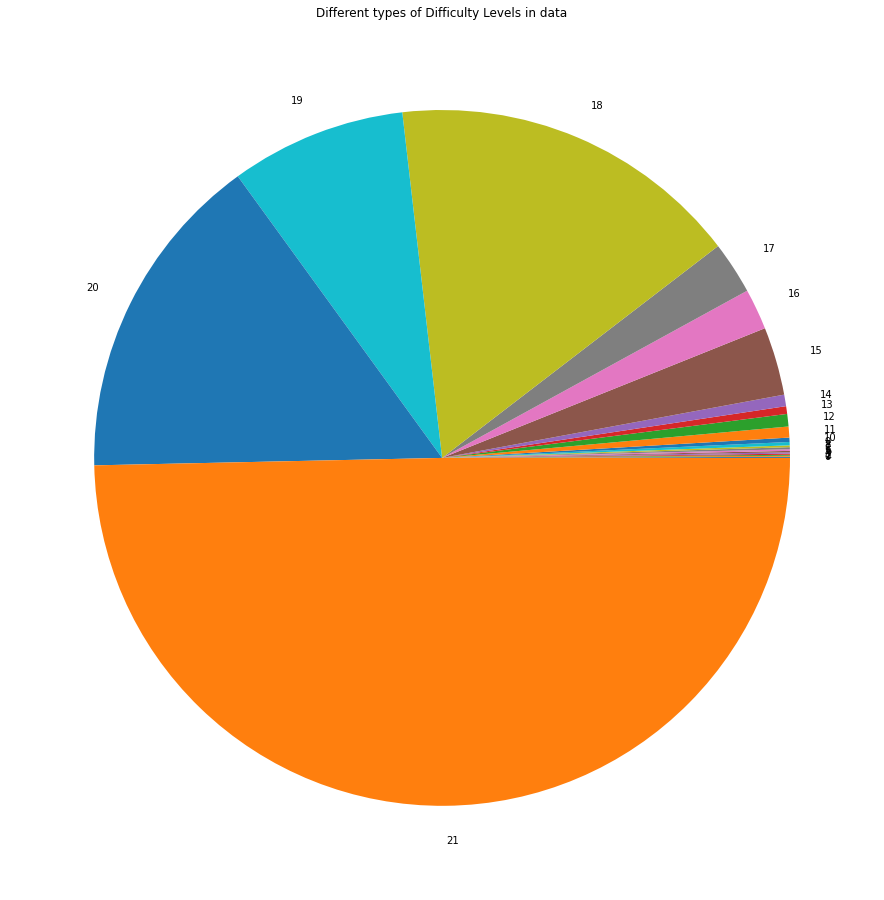

In [19]:
group_data = data1.groupby('difficulty level').size()
plt.figure(figsize = (16,16))
group_data.plot(kind='pie')
plt.title("Different types of Difficulty Levels in data")
plt.ylabel("")
plt.show()

In [20]:
Dos = ['land','neptune','smurf','pod','back','teardrop']
Probe = ['portsweep','ipsweep','satan','nmap']
U2R = ['buffer_overflow','loadmodule','perl','rootkit']

def encode_attack(vec):
    if vec in Dos:
        return "Dos"
    elif vec in Probe:
        return "Probe";
    elif vec in U2R:
        return "U2R"
    elif vec == "normal":
        return "normal"
    else:
        return "R2L"

In [21]:
data1['attack_type'] = data1['class'].apply(encode_attack)
data1.iloc[:10, -5:]

,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty level,attack_type
0,0.05,0.00,normal,20,normal
1,0.00,0.00,normal,15,normal
2,0.00,0.00,neptune,19,Dos
3,0.00,0.01,normal,21,normal
4,0.00,0.00,normal,21,normal
5,1.00,1.00,neptune,21,Dos
6,0.00,0.00,neptune,21,Dos
7,0.00,0.00,neptune,21,Dos
8,0.00,0.00,neptune,21,Dos
9,0.00,0.00,neptune,21,Dos


In [22]:
data12 = data1.groupby('attack_type').size()
data12

attack_type
Dos       45927
Probe     11656
R2L         995
U2R          52
normal    67343
dtype: int64

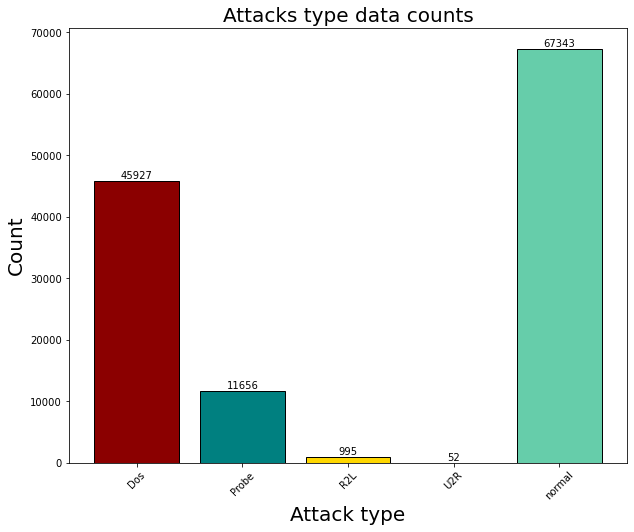

In [23]:
fig = plt.figure(figsize = (10,8))
r_ = [round(each, 2) for each in data12.values]
ax = fig.add_subplot(111)
ax.bar(data12.index, data12.values, color = ['darkred', 'teal', 'gold', 'lightseagreen', "mediumaquamarine"], edgecolor = 'black')
ax.set_xticklabels(data12.index, rotation = 45)
ax.set_xlabel("Attack type", fontsize = 20)
ax.set_ylabel("Count", fontsize = 20)
ax.set_title("Attacks type data counts", fontsize = 20)

for i in range(len(data12.values)):
    plt.annotate(str(r_[i]), xy=(data12.index[i],r_[i]+1), ha='center', va='bottom')

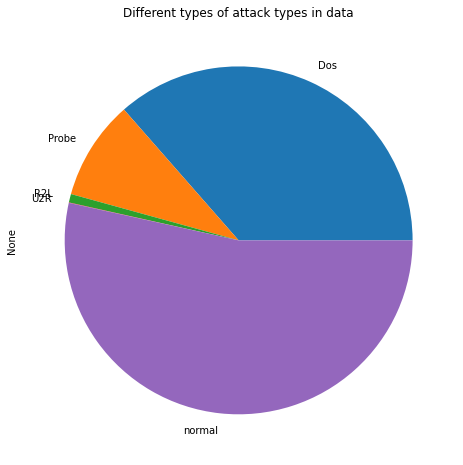

In [24]:
group_data = data1.groupby('attack_type').size()
plt.figure(figsize = (10,8))
group_data.plot(kind='pie')
plt.title("Different types of attack types in data")
plt.show()

<AxesSubplot:>

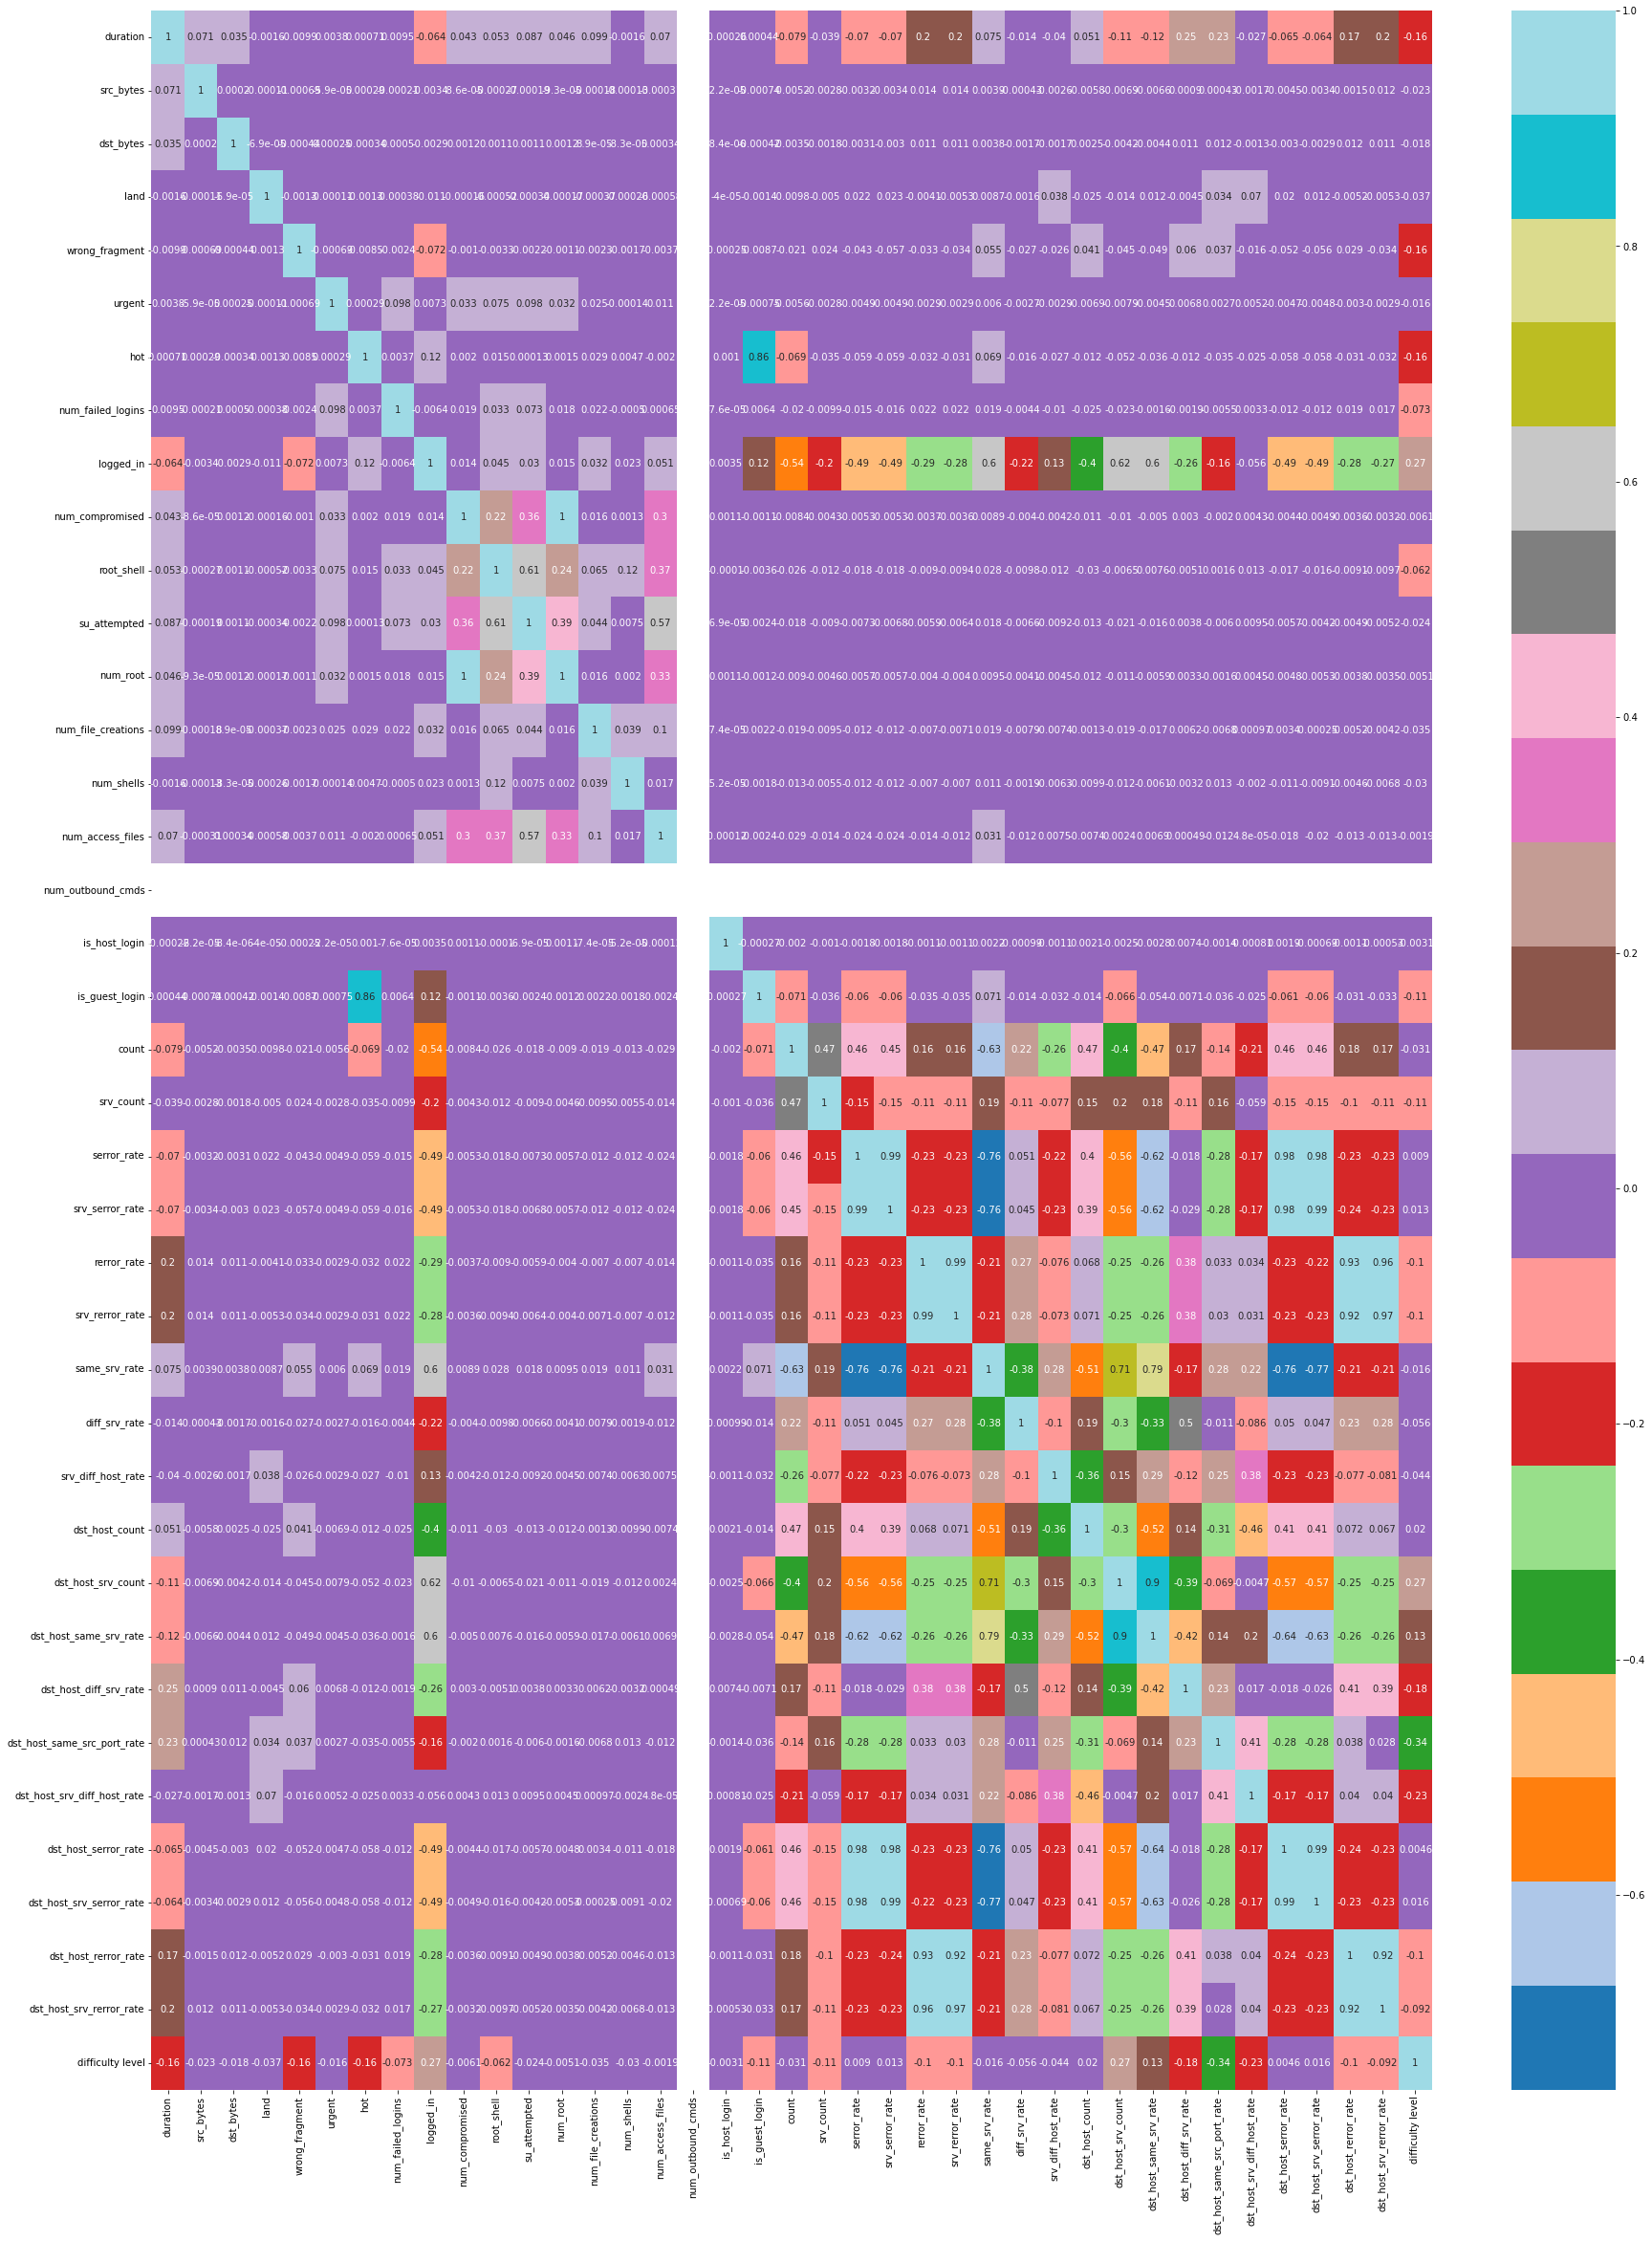

In [25]:
plt.figure(figsize=(30, 40))
sns.heatmap(data1.corr(), annot=True, cmap="tab20", annot_kws={"size":10})

In [26]:
numerical_cols = [one for each,one in zip(list(data1.dtypes),data1.dtypes.index)  if each == 'int64' or each == 'float64']
numerical_cols

['duration',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'difficulty level']

In [27]:
def attack_encode(value):
    if value == 'normal':
        return 0;
    elif value == "Dos":
        return 1;
    elif value == 'Probe':
        return 2;
    elif value == 'R2L':
        return 3;
    else:
        return 4;

In [28]:
data1['intrusion_code'] = data1['attack_type'].apply(attack_encode)
data1.iloc[:10, -5:]

,dst_host_srv_rerror_rate,class,difficulty level,attack_type,intrusion_code
0,0.00,normal,20,normal,0
1,0.00,normal,15,normal,0
2,0.00,neptune,19,Dos,1
3,0.01,normal,21,normal,0
4,0.00,normal,21,normal,0
5,1.00,neptune,21,Dos,1
6,0.00,neptune,21,Dos,1
7,0.00,neptune,21,Dos,1
8,0.00,neptune,21,Dos,1
9,0.00,neptune,21,Dos,1


In [29]:
data2['attack_type'] = data2['class'].apply(encode_attack)
data2.iloc[:20, -10:]

,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty level,attack_type
0,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21,Dos
1,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21,Dos
2,0.04,0.61,0.02,0.00,0.00,0.00,0.00,normal,21,normal
3,0.00,1.00,0.28,0.00,0.00,0.00,0.00,saint,15,R2L
4,0.17,0.03,0.02,0.00,0.00,0.83,0.71,mscan,11,R2L
5,0.00,0.01,0.03,0.01,0.00,0.00,0.00,normal,21,normal
6,0.72,0.00,0.00,0.00,0.00,0.72,0.04,normal,21,normal
7,0.00,0.00,0.00,0.01,0.01,0.02,0.02,guess_passwd,15,R2L
8,0.00,0.01,0.03,0.00,0.00,0.00,0.00,normal,21,normal
9,0.08,0.02,0.00,0.00,0.00,0.00,0.00,guess_passwd,7,R2L


In [30]:
data2['intrusion_code'] = data2['attack_type'].apply(attack_encode)
data2.iloc[:10, -5:]

,dst_host_srv_rerror_rate,class,difficulty level,attack_type,intrusion_code
0,1.00,neptune,21,Dos,1
1,1.00,neptune,21,Dos,1
2,0.00,normal,21,normal,0
3,0.00,saint,15,R2L,3
4,0.71,mscan,11,R2L,3
5,0.00,normal,21,normal,0
6,0.04,normal,21,normal,0
7,0.02,guess_passwd,15,R2L,3
8,0.00,normal,21,normal,0
9,0.00,guess_passwd,7,R2L,3


In [31]:
data1 = data1.drop(columns = ['class','difficulty level', 'attack_type'])
data2 = data2.drop(columns = ['class', 'difficulty level','attack_type'])

In [32]:
data1.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion_code
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
5,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1
6,0,tcp,private,S0,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
7,0,tcp,private,S0,0,0,0,0,0,0,...,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,1
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
9,0,tcp,private,S0,0,0,0,0,0,0,...,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1


In [33]:
data2.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion_code
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.00,0.00,1.00,1.00,1
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,1
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,0
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,3
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,3
5,0,tcp,http,SF,267,14515,0,0,0,0,...,255,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,0
6,0,tcp,smtp,SF,1022,387,0,0,0,0,...,28,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04,0
7,0,tcp,telnet,SF,129,174,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,3
8,0,tcp,http,SF,327,467,0,0,0,0,...,255,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,0
9,0,tcp,ftp,SF,26,157,0,0,0,0,...,26,0.50,0.08,0.02,0.00,0.00,0.00,0.00,0.00,3


In [34]:
data1.corr()['intrusion_code'].sort_values(ascending = False)

intrusion_code                 1.000000
dst_host_diff_srv_rate         0.391328
count                          0.388358
dst_host_srv_serror_rate       0.384796
dst_host_serror_rate           0.382118
serror_rate                    0.381646
srv_serror_rate                0.378669
dst_host_same_src_port_rate    0.319096
dst_host_srv_rerror_rate       0.310227
srv_rerror_rate                0.309909
rerror_rate                    0.308668
dst_host_rerror_rate           0.293805
diff_srv_rate                  0.282314
dst_host_srv_diff_host_rate    0.239646
dst_host_count                 0.196102
duration                       0.129443
hot                            0.065085
wrong_fragment                 0.054795
is_guest_login                 0.030600
num_failed_logins              0.023120
src_bytes                      0.012981
srv_diff_host_rate             0.010456
dst_bytes                      0.008651
root_shell                     0.007758
num_shells                     0.005208


In [35]:
data2.corr()['intrusion_code'].sort_values(ascending = False)

intrusion_code                 1.000000
diff_srv_rate                  0.280776
dst_host_diff_srv_rate         0.241579
rerror_rate                    0.240042
srv_rerror_rate                0.230895
is_guest_login                 0.227441
dst_host_rerror_rate           0.222933
dst_host_srv_rerror_rate       0.211134
num_failed_logins              0.208041
duration                       0.197946
dst_host_count                 0.174656
srv_serror_rate                0.126344
serror_rate                    0.125368
dst_host_srv_serror_rate       0.117150
dst_host_serror_rate           0.109715
hot                            0.063953
dst_host_srv_diff_host_rate    0.056580
srv_diff_host_rate             0.051141
root_shell                     0.047797
num_shells                     0.045656
is_host_login                  0.034682
urgent                         0.032066
src_bytes                      0.024363
dst_host_same_src_port_rate    0.007721
num_file_creations             0.005051


In [36]:
data1 = data1.drop(columns=['num_outbound_cmds', 'srv_count', 'dst_bytes', 'src_bytes', 
                                  'land', 'is_host_login', 'urgent', 'num_failed_logins', 'num_shells'] , axis = 1)

data2 = data2.drop(columns=['num_outbound_cmds', 'srv_count', 'dst_bytes', 'src_bytes', 
                                  'land', 'is_host_login', 'urgent', 'num_failed_logins', 'num_shells'
                                 ] , axis = 1)

In [37]:
data1_new = pd.get_dummies(data1)
data2_new = pd.get_dummies(data2)

In [38]:
X = data1_new.drop(columns = 'intrusion_code')
y = data1_new['intrusion_code']

In [39]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [41]:
dtree = DecisionTreeClassifier(criterion='gini',max_depth=None)
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [42]:
predictions = dtree.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13361
           1       1.00      1.00      1.00      9245
           2       0.99      0.99      0.99      2381
           3       0.93      0.92      0.92       197
           4       0.33      0.27      0.30        11

    accuracy                           1.00     25195
   macro avg       0.85      0.84      0.84     25195
weighted avg       1.00      1.00      1.00     25195



In [43]:
cm=confusion_matrix(y_test,predictions)
print(cm)

[[13332     3     9    11     6]
 [    8  9236     1     0     0]
 [   19     1  2359     2     0]
 [   15     0     1   181     0]
 [    5     1     1     1     3]]


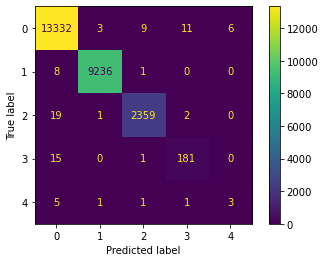

In [44]:
metrics.classification_report(y_test,predictions)
metrics.plot_confusion_matrix(dtree, X_test, y_test)

In [45]:
lr = LogisticRegression(n_jobs=-1, random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(n_jobs=-1, random_state=42)

In [46]:
pred = lr.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     13361
           1       1.00      1.00      1.00      9245
           2       0.98      0.96      0.97      2381
           3       0.77      0.74      0.75       197
           4       0.50      0.18      0.27        11

    accuracy                           0.99     25195
   macro avg       0.85      0.77      0.79     25195
weighted avg       0.99      0.99      0.99     25195



In [47]:
conf_mat=confusion_matrix(y_test,pred)
print(conf_mat)

[[13248    30    45    37     1]
 [   19  9221     5     0     0]
 [   90     9  2280     2     0]
 [   48     3     0   145     1]
 [    5     0     0     4     2]]


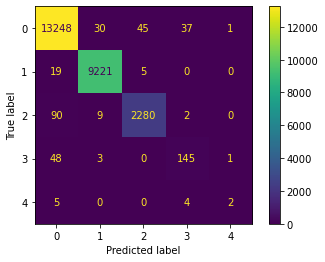

In [48]:
metrics.plot_confusion_matrix(lr, X_test, y_test)